# Capstone Project (Aug 2021)

## Data Wrangling and Machine Learning to Identify the Factors Affecting Credit Card Holders' Spending Behaviour

***Business Problem:***

One of the global banks would like to understand what factors drive credit card spending in order to set a proper credit limit. To solve this problem, the bank conducted a survey of 5000 customers and collected data.
The objective of this capstone is to understand what is driving the total spend (Primary Card + Secondary card). Given the variables, predict the credit limit for new applicants.

### 1. Import libraries

In [1]:
# import relevant modules
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### 2. Load data sets

Load and inspect data sets form Excel file named "Data Set.xlsx."

In [2]:
data_df = pd.read_excel("Data Set.xlsx")

In [3]:
data_df.head(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


### 3. Data Wrangling

#### 3.1 Merge/ Clean Data

Since some credit card holders own 2 credit cards (primary and secondary credit card), we'll sum the total spending for both cards and treat the resulting summation as the dependent variable (Y-axis)

In [4]:
# To create Y we need to sum up cardspent(first card spent amount) and card2spent(Second card spent amount)

data_df['totalspend'] = data_df['cardspent'] + data_df['card2spent']

In [5]:
# new Y column named 'totalspend' is now created

data_df.head(1)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspend
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.8,0,3,5,1,6.5,1.871802,34.4,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.5,3.38439,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.0,NaN,0.0,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46


#### 3.1.1 Drop Variables

One of the steps taken to clean the data sets is by dropping some variables that will not add any value to our analysis. Some of the variables are columns named 'cardspent' (first card spent amount), 'card2spent' (Second card spent amount), 'custid', and 'birthmonth'.

In [6]:
# Drop cardspent(first card spent amount) and card2spent(Second card spent amount) because they're not adding any value
# Also we are dropping "custid","birthmonth" because cust id is unique and birth month is not adding any value

data_df.drop(["cardspent","card2spent","custid","birthmonth"],axis=1, inplace=True)

In [7]:
data_df.head(1)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspend
0,1,2.0,1,20,2,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.5,1.871802,34.4,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.5,3.38439,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.0,NaN,0.0,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46


#### 3.1.2 Checking the linearity of our data:

From the scatter plots obtained for our dependent variable (Y-axis) against some of the independent variables (X-axis) below, it's safe to say that our data are linear and normal, hence we may further proceed our analysis with linear modelling.

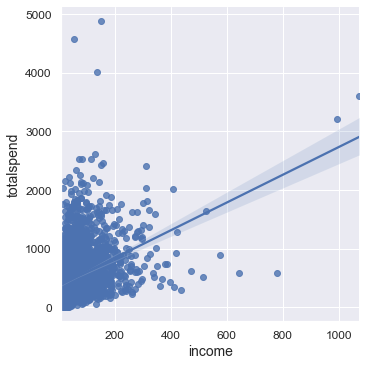

In [8]:
sns.lmplot(x='income', y='totalspend', data=data_df)

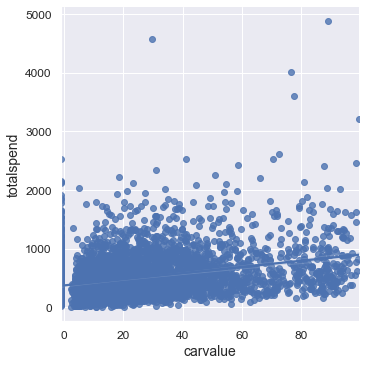

In [9]:
sns.lmplot(x='carvalue', y='totalspend', data=data_df)

#### 3.1.3 Separating our numerical and categorical variables

In this step, we'll first convert the categorical variables (eg: 'region', 'townsize', gender') into object datatype as we want to then convert them to one-hot encoding algorithm. 

In [10]:
for x in ['region','townsize','gender','agecat','edcat','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
    data_df[x]=data_df[x].astype('object')

In [11]:
data_df.dtypes

region          object
townsize        object
gender          object
age              int64
agecat          object
                ...   
news            object
response_01     object
response_02     object
response_03     object
totalspend     float64
Length: 127, dtype: object

Separating numerical and categorical variables and convert them into dataframes

In [12]:
# Numerical variables
numeric_names = [key for key in dict(data_df.dtypes) if dict(data_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Categorical variables
cat_names = [key for key in dict(data_df.dtypes) if dict(data_df.dtypes)[key] in ['object']]

In [13]:
data_df_num=data_df[numeric_names]
data_df_num.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.0,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [14]:
data_df_category=data_df[cat_names]
data_df_category.head()

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


#### 3.1.4 Creating Data Summary Report

We'll now generate a data summary report for each numerical and categorical variables respectively (eg: count, mean, sum, varience, etc.) to understand the data better. 

In [15]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_df_num.apply(lambda x: var_summary(x)).T

num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.000000,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,72715.000000,14.543000,14.000000,3.281083,10.765504,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,273798.000000,54.759600,38.000000,55.377511,3066.668742,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,18499.546992,3.699909,3.637586,0.747072,0.558116,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,49770.800000,9.954160,8.800000,6.399783,40.957226,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000


In [16]:
def cat_summary(x):
    return pd.Series([x.count(),x.mode(),x.isnull().sum(),x.unique()],
                    index=['N','Mode','NMISS','UniqueValues'])

category_summary=data_df_category.apply(lambda x:cat_summary(x)).T

category_summary

,N,Mode,NMISS,UniqueValues
region,5000,0 5 dtype: object,0,"[1, 5, 3, 4, 2]"
townsize,4998,0 1.0 dtype: object,2,"[2.0, 5.0, 4.0, 3.0, 1.0, nan]"
gender,5000,0 1 dtype: object,0,"[1, 0]"
agecat,5000,0 4 dtype: object,0,"[2, 6, 3, 5, 4]"
edcat,5000,0 2 dtype: object,0,"[3, 4, 2, 1, 5]"
...,...,...,...,...
ownfax,5000,0 0 dtype: object,0,"[0, 1]"
news,5000,0 0 dtype: object,0,"[0, 1]"
response_01,5000,0 0 dtype: object,0,"[0, 1]"
response_02,5000,0 0 dtype: object,0,"[1, 0]"


#### 3.2 Handle Outliers

We'll now have to handle some outliers in our numerical variable for ease of future analysis and modelling

In [17]:
def outlier_capping(x):
    x = x.clip(upper=(x.quantile(0.99)))
    x = x.clip(lower=(x.quantile(0.01)))
    return x

data_df_num = data_df_num.apply(lambda x: outlier_capping(x))

#### 3.3 Handle Missing Values

In this step, we'll replace missing values in numerical variables with the mean value and categorical variables with mode value respectively.

In [18]:
# replacing missing values in numerical variables with mean()

for x in data_df_num.columns:
    data_df_num[x].fillna(data_df_num[x].mean(), inplace=True)

In [19]:
# replacing missing values in categorical variables with mode()

for x in data_df_category.columns:
    data_df_category[x].fillna(data_df_category[x].mode()[0], inplace=True)

In [20]:
print ("\nMissing values in numerical data :  ", data_df_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", data_df_category.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


#### 3.4 Creating dummies for categorical variables

In [21]:
def create_dummies(df, colname):
    dummies = pd.get_dummies(df[colname], prefix = colname)
    df = pd.concat([df, dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [22]:
cat_varlist=list(data_df_category.columns)


In [23]:
for x in cat_varlist:
    data_df_category[x]=data_df_category[x].astype('category')
    data_df_category=create_dummies(data_df_category ,x)

In [24]:
# renaming townsize column names for easy processing

data_df_category.rename(columns={'townsize_1.0': 'townsize_1','townsize_2.0': 'townsize_2','townsize_3.0': 'townsize_3','townsize_4.0': 'townsize_4','townsize_5.0': 'townsize_5'}, inplace=True)

In [25]:
# dropping the 'No' part for categorical variables that have 2 options (0 = No, 1 = Yes). 
# for gender: 0 = Male, 1 = Female

data_df_category.drop(['gender_0','union_0','retire_0','default_0','marital_0','homeown_0','carbuy_0','commutecar_0','commutemotorcycle_0','commutecarpool_0','commutebus_0','commuterail_0','commutepublic_0','commutebike_0','commutewalk_0','commutenonmotor_0','telecommute_0','polparty_0','polcontrib_0','vote_0','cardfee_0','card2fee_0','active_0','churn_0','tollfree_0','equip_0', 'callcard_0','wireless_0','multline_0','voice_0','pager_0','callid_0', 'callwait_0', 'forward_0', 'confer_0', 'ebill_0', 'owntv_0', 'ownvcr_0', 'owndvd_0', 'owncd_0', 'ownpda_0', 'ownpc_0', 'ownipod_0', 'owngame_0', 'ownfax_0', 'news_0', 'response_01_0', 'response_02_0', 'response_03_0'], axis=1, inplace=True)

In [26]:
data_df_category.head()

,region_1,region_2,region_3,region_4,region_5,townsize_1,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6,edcat_1,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_0,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_1,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_-1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_1,hometype_2,hometype_3,hometype_4,address_0,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_0,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_-1,carown_0,carown_1,cartype_-1,cartype_0,cartype_1,carcatvalue_-1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_-1,carbought_0,carbought_1,carbuy_1,commute_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_1,reason_2,reason_3,reason_4,reason_9,polview_1,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_1,card_2,card_3,card_4,card_5,cardtype_1,cardtype_2,cardtype_3,cardtype_4,cardbenefit_1,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_0,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_1,card2_2,card2_3,card2_4,card2_5,card2type_1,card2type_2,card2type_3,card2type_4,card2benefit_1,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_0,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wirel

#### 3.5 Merge numerical and categorical data

Since we now have a clean data for numerical and categorical variables, we'll now merge back both data sets.

In [27]:
data_df_new = pd.concat([data_df_num, data_df_category], axis=1)
data_df_new.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend,region_1,region_2,region_3,region_4,region_5,townsize_1,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6,edcat_1,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_0,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_1,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_-1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_1,hometype_2,hometype_3,hometype_4,address_0,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_0,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_-1,carown_0,carown_1,cartype_-1,cartype_0,cartype_1,carcatvalue_-1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_-1,carbought_0,carbought_1,carbuy_1,commute_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_1,reason_2,reason_3,reason_4,reason_9,polview_1,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_1,card_2,card_3,card_4,card_5,cardtype_1,cardtype_2,cardtype_3,cardtype_4,cardbenefit_1,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_0,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_1,card2_2,card2_3,card2_4,card2_5,card2type_1,card2type_2,card2type_3,card2type_4,card2benefit_1,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_0,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14

### 4. Exploratory Data Analysis

Now that we have cleaned the data sets, they're now ready for exploratory data analysis. Firstly, let's examine the distribution pattern for our dependent variable, 'totalspend'.

<AxesSubplot:xlabel='totalspend', ylabel='Density'>

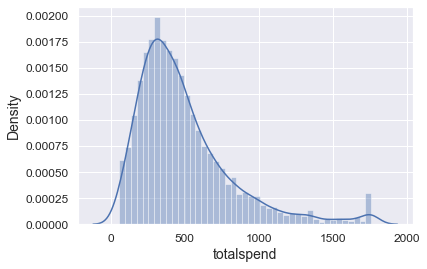

In [28]:
sns.distplot(data_df_new.totalspend)

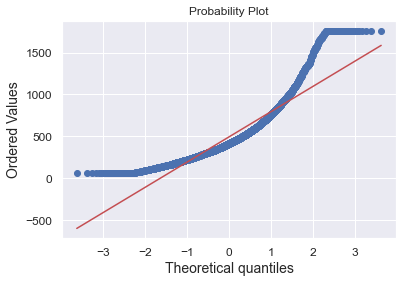

In [29]:
import pylab

stats.probplot(data_df_new.totalspend, dist="norm", plot=pylab )
pylab.show()

It can be seen that the distribution of our data sets is right skewed and not perfectly normal, so we'll use the boxcox technique to make it perfectly normal.

In [30]:
data_df_new['bc_total_spend'], fitted_lambda = stats.boxcox(data_df_new['totalspend'])

<AxesSubplot:xlabel='bc_total_spend', ylabel='Density'>

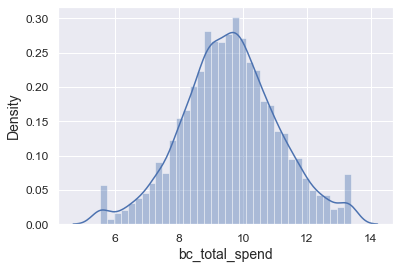

In [31]:
sns.distplot(data_df_new.bc_total_spend)

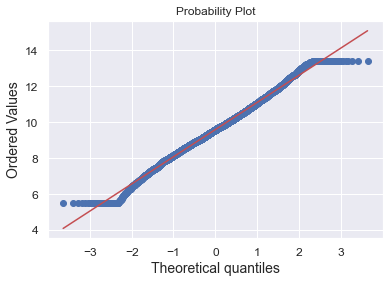

In [32]:
stats.probplot(data_df_new.bc_total_spend, dist="norm", plot=pylab )
pylab.show()

Dropping column 'totalspend' since now we'll use 'bc_total_spend'.

In [33]:
data_df_new.drop(['totalspend'],axis=1,inplace=True)

In [34]:
data_df_new["bc_total_spend"].mean()

9.591980265955437

### 5. Modelling

Dividing data into train and test set for modelling.

In [35]:
x = data_df_new.drop('bc_total_spend',axis=1)
y = data_df_new['bc_total_spend']

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
print (len(x_train))
print (len(x_test))
print (len(y_train))
print (len(y_test))

4000
1000
4000
1000


#### 5.1 Feature selection

As we have a lot of independent variables in our data sets, we'll need to select only the important features for our prediction. Hence, we'll perform feature selection with Random Forrest Regressor.


In [38]:
from sklearn.ensemble import RandomForestRegressor


In [39]:
model = RandomForestRegressor() 
model.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
indices = np.argsort(model.feature_importances_)[::-1] # sorting the indices of the feature importance in descending order
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )

for f in range(x_train.shape[1]):
    feature_rank.loc[f] = [f+1, x_train.columns[indices[f]], model.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,card_1,0.119882
1,2,income,0.087795
2,3,lninc,0.081626
3,4,card2_1,0.052164
4,5,carvalue,0.022730
...,...,...,...
417,418,employ_51,0.000000
418,419,employ_48,0.000000
419,420,employ_46,0.000000
420,421,employ_41,0.000000


The features are now sorted according to their ranks and we can now see which features are important and which are not with respect to our dependent variable. So in the next part, we'll select only top 75 important features.

In [41]:
top_75 = feature_rank.loc[0:74,['feature']]
top_75 = top_75['feature'].tolist()


In [42]:
# create new dataframe with the top 75 features
top_feature = top_75
top_feature.append('bc_total_spend')

df_top_feature = data_df_new[top_feature]
df_top_feature.head()

,card_1,income,lninc,card2_1,carvalue,debtinc,hourstv,commutetime,age,lncreddebt,lnothdebt,creddebt,othdebt,lncardmon,ed,pets,tenure,reason_2,lncardten,longmon,lnlongmon,cardmon,lntollmon,cardten,spoused,lntollten,longten,lnlongten,lnequipmon,tollmon,lnwiremon,tollten,lnequipten,pets_dogs,reside,pets_cats,pets_freshfish,equipten,equipmon,gender_1,lnwireten,card_4,cardtype_4,cardtenure_23,vote_1,wireten,commutewalk_1,wiremon,card2type_4,commutebus_1,card2type_2,homeown_1,carbuy_1,active_1,cardbenefit_3,townsize_3,cardbenefit_1,polparty_1,cars_1,hometype_1,hometype_2,cars_2,card2benefit_4,owngame_1,polview_4,jobcat_1,jobcat_2,card2benefit_1,card2fee_1,card2type_1,cardtype_2,commutecarpool_1,hometype_3,spousedcat_2,polview_2,bc_total_spend
0,0,31.0,3.433987,0,14.3,11.1,13,22.0,20,0.183079,0.806516,1.200909,2.240091,2.656757,15,0,5,0,4.094345,6.50,1.871802,14.25,3.367296,60.0,-1,5.081715,34.40,3.538057,3.384390,29.0,3.604226,161.05,4.837075,0,3,0,0,126.1,29.50,1,6.808151,0,0,0,1,0.00,1,0.00,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,7.323447
1,0,15.0,2.708050,0,6.8,18.6,18,29.0,22,0.200505,0.449788,1.222020,1.567980,2.772589,17,6,39,0,6.413459,8.90,2.186051,16.00,3.242727,610.0,-1,6.585937,330.60,5.800909,4.004602,0.0,3.821004,0.00,7.588324,0,2,0,6,1975.0,54.85,0,7.428660,0,1,0,0,1683.55,0,45.65,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,6.039640
2,0,35.0,3.555348,0,18.8,9.9,21,24.0,67,-0.074056,0.930738,0.928620,2.536380,3.135494,14,3,65,1,7.251345,28.40,3.346389,23.00,3.242727,1410.0,13,6.585937,1858.35,7.527444,3.599725,0.0,3.604226,0.00,6.747846,1,3,2,0,0.0,0.00,1,6.808151,0,0,0,0,0.00,0,0.00,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,9.243615
3,0,20.0,2.995732,0,8.7,5.7,26,38.0,23,-3.401690,0.110826,0.033160,1.117200,3.044522,16,0,36,0,6.529419,6.00,1.791759,21.00,3.242727,685.0,18,6.585937,199.45,5.295564,3.599725,0.0,3.604226,0.00,6.747846,0,5,0,0,0.0,0.00,0,6.808151,0,0,0,0,0.00,0,0.00,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,9.239995
4,0,23.0,3.135494,1,10.6,1.7,27,32.0,26,-1.538705,-1.735336,0.214659,0.176341,2.847812,16,0,21,0,5.886104,3.05,1.115142,17.25,2.803360,360.0,13,5.960232,74.10,4.305416,3.599725,16.5,2.947067,387.70,6.747846,0,4,0,0,0.0,0.00,0,6.018106,1,0,0,0,410.80,1,19.05,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,10.063778


#### 5.2 Handling multicollinearity

Since there are some independent variables that are highly correlated to each other, we need to identify the degree of correlation of these variables and remove them to avoid problems when we fit the model and interperet the results later on.

In [43]:
# some features will have high correlation with its log values (ln), so we'll drop the log values features first

ln_features = df_top_feature.columns[df_top_feature.columns.str.startswith('ln')]

df_top_feature.drop(ln_features, axis=1, inplace=True)
df_top_feature.head()

,card_1,income,card2_1,carvalue,debtinc,hourstv,commutetime,age,creddebt,othdebt,ed,pets,tenure,reason_2,longmon,cardmon,cardten,spoused,longten,tollmon,tollten,pets_dogs,reside,pets_cats,pets_freshfish,equipten,equipmon,gender_1,card_4,cardtype_4,cardtenure_23,vote_1,wireten,commutewalk_1,wiremon,card2type_4,commutebus_1,card2type_2,homeown_1,carbuy_1,active_1,cardbenefit_3,townsize_3,cardbenefit_1,polparty_1,cars_1,hometype_1,hometype_2,cars_2,card2benefit_4,owngame_1,polview_4,jobcat_1,jobcat_2,card2benefit_1,card2fee_1,card2type_1,cardtype_2,commutecarpool_1,hometype_3,spousedcat_2,polview_2,bc_total_spend
0,0,31.0,0,14.3,11.1,13,22.0,20,1.200909,2.240091,15,0,5,0,6.50,14.25,60.0,-1,34.40,29.0,161.05,0,3,0,0,126.1,29.50,1,0,0,0,1,0.00,1,0.00,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,7.323447
1,0,15.0,0,6.8,18.6,18,29.0,22,1.222020,1.567980,17,6,39,0,8.90,16.00,610.0,-1,330.60,0.0,0.00,0,2,0,6,1975.0,54.85,0,0,1,0,0,1683.55,0,45.65,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,6.039640
2,0,35.0,0,18.8,9.9,21,24.0,67,0.928620,2.536380,14,3,65,1,28.40,23.00,1410.0,13,1858.35,0.0,0.00,1,3,2,0,0.0,0.00,1,0,0,0,0,0.00,0,0.00,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,9.243615
3,0,20.0,0,8.7,5.7,26,38.0,23,0.033160,1.117200,16,0,36,0,6.00,21.00,685.0,18,199.45,0.0,0.00,0,5,0,0,0.0,0.00,0,0,0,0,0,0.00,0,0.00,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,9.239995
4,0,23.0,1,10.6,1.7,27,32.0,26,0.214659,0.176341,16,0,21,0,3.05,17.25,360.0,13,74.10,16.5,387.70,0,4,0,0,0.0,0.00,0,1,0,0,0,410.80,1,19.05,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,10.063778


In [44]:
features = df_top_feature.columns[:-1]
feature_join = "+".join(features)


In [45]:
from patsy import dmatrices

y, x = dmatrices('bc_total_spend~'+ feature_join, df_top_feature, return_type='dataframe')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data.sort_values(by=['VIF'],ascending=False)


,feature,VIF
0,Intercept,137.797763
19,longten,39.555457
15,longmon,33.089148
12,pets,13.354591
25,pets_freshfish,11.896235
...,...,...
6,hourstv,1.020285
43,townsize_3,1.017159
56,card2fee_1,1.014606
59,commutecarpool_1,1.012216


VIF determines the strength of the correlation between the independent variables. VIF = 1 means no correlation between the independent variable and the other variables, whereas VIF > 5 indicates high multicollinearity between this independent variable and the others. Therefore, we'll now drop variables with VIF > 10. 

In [47]:
vif_data[vif_data['VIF']>10].sort_values(by=['VIF'],ascending=False)

,feature,VIF
0,Intercept,137.797763
19,longten,39.555457
15,longmon,33.089148
12,pets,13.354591
25,pets_freshfish,11.896235
21,tollten,11.662747
33,wireten,10.962675
35,wiremon,10.919729
17,cardten,10.514798
20,tollmon,10.197711


In [48]:
high_vif=vif_data[vif_data['VIF']>10].reset_index().loc[:,['feature']]
drop_vars= high_vif["feature"].tolist()[1:]
drop_vars

['pets',
 'longmon',
 'cardten',
 'longten',
 'tollmon',
 'tollten',
 'pets_freshfish',
 'wireten',
 'wiremon']

In [49]:
df_top_feature.drop(drop_vars,axis=1,inplace=True)
df_top_feature.head()

,card_1,income,card2_1,carvalue,debtinc,hourstv,commutetime,age,creddebt,othdebt,ed,tenure,reason_2,cardmon,spoused,pets_dogs,reside,pets_cats,equipten,equipmon,gender_1,card_4,cardtype_4,cardtenure_23,vote_1,commutewalk_1,card2type_4,commutebus_1,card2type_2,homeown_1,carbuy_1,active_1,cardbenefit_3,townsize_3,cardbenefit_1,polparty_1,cars_1,hometype_1,hometype_2,cars_2,card2benefit_4,owngame_1,polview_4,jobcat_1,jobcat_2,card2benefit_1,card2fee_1,card2type_1,cardtype_2,commutecarpool_1,hometype_3,spousedcat_2,polview_2,bc_total_spend
0,0,31.0,0,14.3,11.1,13,22.0,20,1.200909,2.240091,15,5,0,14.25,-1,0,3,0,126.1,29.50,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,7.323447
1,0,15.0,0,6.8,18.6,18,29.0,22,1.222020,1.567980,17,39,0,16.00,-1,0,2,0,1975.0,54.85,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,6.039640
2,0,35.0,0,18.8,9.9,21,24.0,67,0.928620,2.536380,14,65,1,23.00,13,1,3,2,0.0,0.00,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,9.243615
3,0,20.0,0,8.7,5.7,26,38.0,23,0.033160,1.117200,16,36,0,21.00,18,0,5,0,0.0,0.00,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,9.239995
4,0,23.0,1,10.6,1.7,27,32.0,26,0.214659,0.176341,16,21,0,17.25,13,0,4,0,0.0,0.00,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,10.063778


In [50]:
df_top_feature.shape

(5000, 54)

Checking the relationship between the features (independent variables) and the total spend (dependent variable)

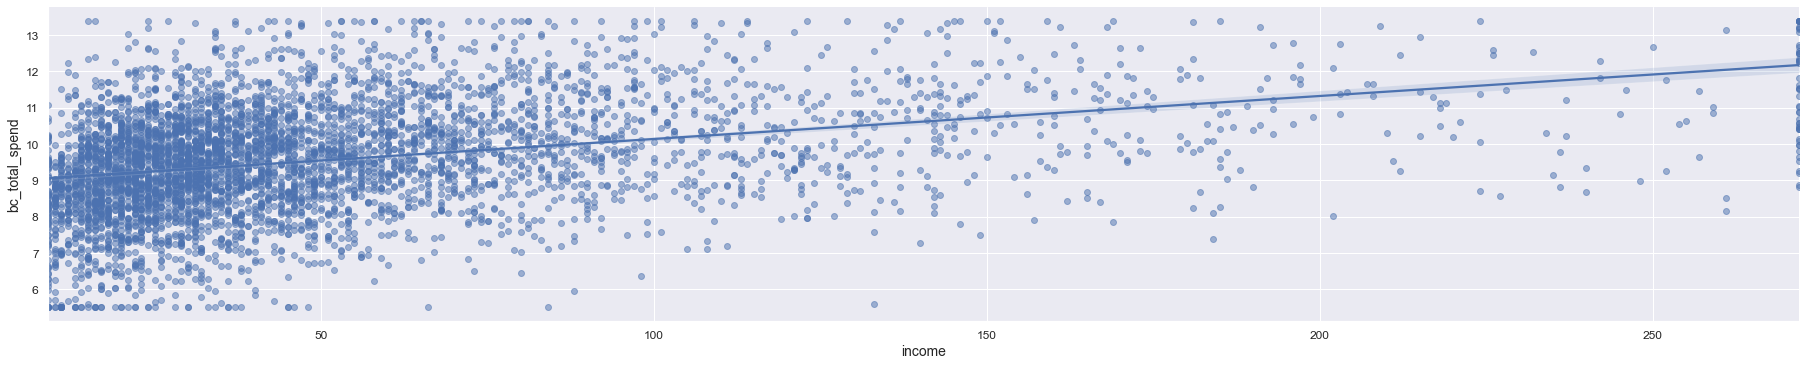

In [51]:
sns.lmplot(x="income",y="bc_total_spend",data=df_top_feature,aspect=5,scatter_kws={'alpha':0.5})

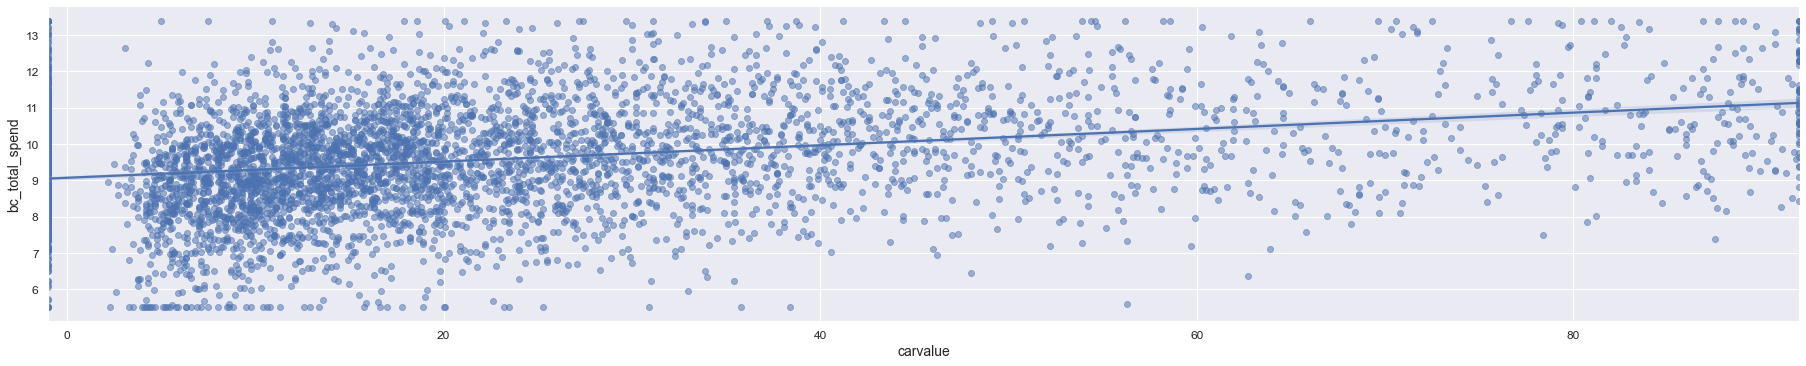

In [52]:
sns.lmplot(x="carvalue",y="bc_total_spend",data=df_top_feature,aspect=5,scatter_kws={'alpha':0.5})

#### 5.3 Build Regression model using the following models:

We'll now build our regression model using the following algorithms and then evaluate the algorithm to identify how well they perform with our datasets.

In [53]:
x = df_top_feature.drop('bc_total_spend',axis=1)
y = df_top_feature['bc_total_spend']

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 5.3.1. Linear Regression 


In [56]:
# Method 1

from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)
y_pred_lr = regressor_lr.predict(x_test)

In [57]:
from sklearn import metrics

# Performace for Linear Regression algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('R-Squared:', metrics.r2_score(y_test, y_pred_lr))


Mean Absolute Error: 1.0151432211811122
Mean Squared Error: 1.6439244370144517
Root Mean Squared Error: 1.2821561671709307
R-Squared: 0.33913890763414367


#### 5.3.2 Random Forest Regression

In [58]:
# Method 2

regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)
y_pred_rf = regressor_rf.predict(x_test)

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R-Squared:', metrics.r2_score(y_test, y_pred_rf))


Mean Absolute Error: 1.0143807821600388
Mean Squared Error: 1.6155622351968355
Root Mean Squared Error: 1.271047691944262
R-Squared: 0.35054057260916593


Based on our model evaluation, it can be seen that there isn't much difference on the performance for both Random Forest Regression and Linear Regression models for our datasets. However, we can always tune the hyperparameters of each model to best fit them for our data (eg: n_estimators, random_state, etc.). And for the purpose of this study, we'll only use the default settings for each model and will proceed with the Random Forest Regressor model for our next steps. 

### 6. Analysis

#### 6.1 Identifying the key drivers that affect customers' spending behaviour

We'll now identify the factors affecting customer's credit card spending behaviour based on the coefficient factors.

In [60]:
# Top 10 factors that affect customer's credit card total spending

coeff_df_rf = pd.DataFrame(regressor_rf.feature_importances_, x.columns, columns=['Coefficient'])
key_drivers = coeff_df_rf.sort_values('Coefficient', ascending = False, key = abs).head(10)
key_drivers['Coefficient']=((key_drivers['Coefficient'])*100).round(2)

In [63]:
# creating data definition dictionary

definition = ["Household income in thousands",
        "Primary credit card type: American Express",
        "Credit card debts in thousands",
        "Secondary credit card type: American Express",
        "Primary vehicle sticker price",
        "Other debts in thousands",
        "Age in years",
        "Number of months with service",
        "Debt to income ration (x100)",
        "Calling card last month"]

data_dict = {'Feature': key_drivers.index,
        'Definition': definition}
 
# Create DataFrame
df_data_dict = pd.DataFrame(data_dict)

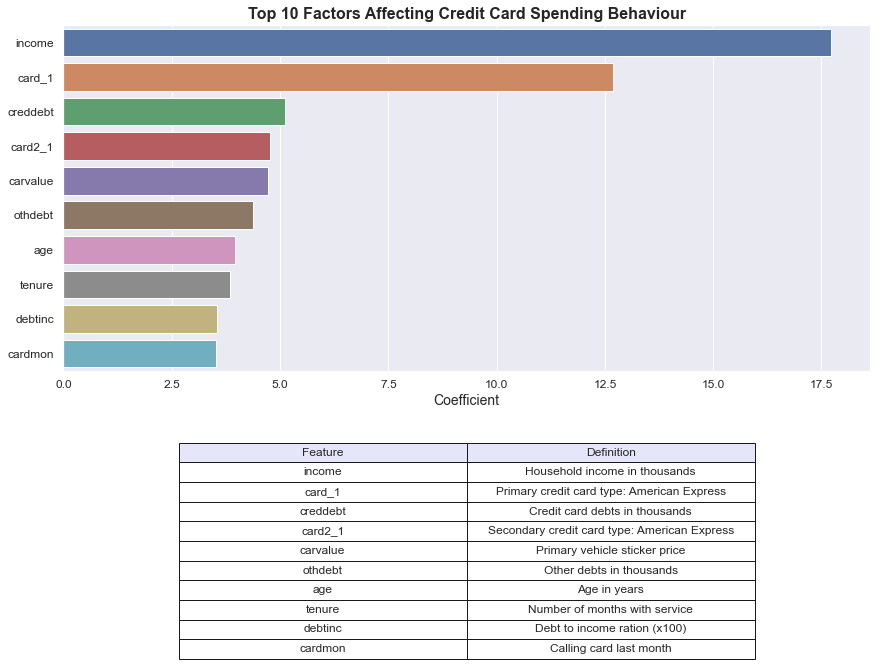

In [70]:
import matplotlib
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

plt.figure(figsize=(16, 10))
plt.title('Top 10 Factors Affecting Credit Card Spending Behaviour', weight='bold').set_fontsize('16')


sns.barplot(x = key_drivers['Coefficient'], y = key_drivers.index, data=coeff_df_rf)

plt.subplots_adjust(left=0.2, bottom=0.4)

colors = ['lavender','lavender']

the_table = plt.table(cellText=df_data_dict.values,
            colLabels=df_data_dict.columns,
            cellLoc = 'center', rowLoc = 'center', colColours = colors,
            transform=plt.gcf().transFigure,
            loc = 'center',
            bbox = ([0.3, 0,0.5, 0.3]))

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)

plt.savefig('Top 10 Factors Affecting Credit Card Total Spending.png', dpi=300, bbox_inches='tight')

plt.show()


Based on the bar chart above, it can be seen that the main key driver that affects customer's spending behaviour is Income. This would be a great starting point for banks to target potential customers based on their income group. 

It's also worth to note that American Express type credit card holders tend to spend more as compared to other types of card. This could be potentially due to the greater perks offered by American Express to their members and the fact that American Express cards are more widely accepted at retail stores globally. Banks can make use of this finding to supply more American Express credit cards to customers in the future to encourage more spending.

#### 6.2 Making Prediction

Making prediction for the credit card total spending for each customer to identify the appropriate credit card spending limit that should be set by the bank:

In [71]:
# Final prediction on the total credit card spending for each customer

from scipy.special import boxcox, inv_boxcox

pred_total_spend = inv_boxcox(regressor_rf.predict(x), fitted_lambda)
pred_total_spend = pd.DataFrame(pred_total_spend.tolist())
pred_total_spend.columns = ["pred_total_spend"]

In [72]:
# Concatenating final prediction with original datasets

testfile = pd.concat([data_df, pred_total_spend], axis=1)
testfile

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspend,pred_total_spend
0,1,2.0,1,20,2,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,810.557562
1,5,5.0,0,22,2,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,826.958007
2,3,4.0,1,67,6,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,820.747391
3,4,3.0,0,23,2,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,768.925863
4,2,2.0,0,26,3,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,688.186506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,68,6,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1,-1,1,4,4,0,0,0,0,0,0,1,1,24,4,1,1,0,64.5,3,0,0,5,3,21.0,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,35,5,3,3,4,0,28,5,0,2,69,0,34.10,3.529297,2405.90,7.785679,0,0.0,NaN,0

### 7. Conclusion




In this Capstone project, we've studied the implementation of Data Wrangling and Machine Learning approach to identify the key drivers for customers' credit card spending behaviour and to predict the appropriate credit card spending limit for each customer. We've implemented Linear Regression and Random Forest Regressor model for our data sets to achieve the project objective. 

Since the project is purposely made for self practice only, the hyperparameters for each algorithm were not properly tuned to achieve the best fit model for our datasets. Hence for future practices, we may play around with additional data cleaning methods and hyperparameters tuning to improve the results. Nevertheless, I found that in overall this project is a good starting point for beginners to integrate newly-acquired Data Science knowledge and demonstrate them using real-life datasets.

### THE END